# 三层BP神经网络实现鲍鱼年龄预测

### 小组成员：温紫珺、谭力仁、沈旭阳、邹子涵

## 导包

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import math

### 数据集解释以及读取

数据集来源：UCI数据集库：https://archive.ics.uci.edu/ml/index.php  

名称/数据类型/度量单位/描述  
-----------------------------  
性别/名义/-/ M，F和I（婴儿）  
长度/连续/毫米/最长的外壳尺寸  
直径/连续/毫米/垂直于长度  
高度/连续/毫米/带有外壳的肉总  
重/连续/克/整个鲍鱼  
剥皮重量/连续/克/重量肉  
内脏重量/连续/克/肠重量（出血后）  
蛋壳重量/连续/克/干后  
环/整数/-/ +1.5给出年龄（以年为单位）  

In [2]:
data = pd.read_csv('abalone.data',header=None,names=['sex','length','diameter','height','wholeweight','shuckedweight','visceraweight','shellweight','rings'])

In [3]:
data

,sex,length,diameter,height,wholeweight,shuckedweight,visceraweight,shellweight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
data.iloc[:,0].value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

In [5]:
data.loc[(data['sex']=='F'),'sex'] = 0
data.loc[(data['sex']=='M'),'sex'] = 1
data.loc[(data['sex']=='I'),'sex'] = 2

In [6]:
data = data.astype('float64')

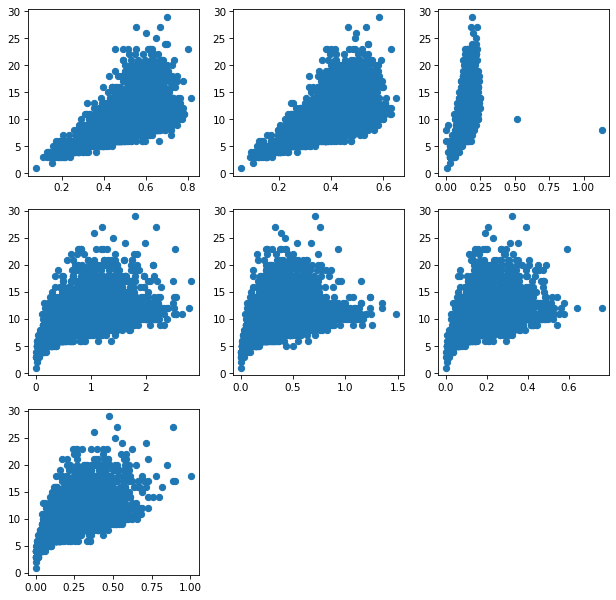

In [7]:
p = plt.figure(figsize=(10,10),dpi=75)
p.add_subplot(3,3,1)
plt.scatter(data.length,data.rings)
p.add_subplot(3,3,2)
plt.scatter(data.diameter,data.rings)
p.add_subplot(3,3,3)
plt.scatter(data.height,data.rings)
p.add_subplot(3,3,4)
plt.scatter(data.wholeweight,data.rings)
p.add_subplot(3,3,5)
plt.scatter(data.shuckedweight,data.rings)
p.add_subplot(3,3,6)
plt.scatter(data.visceraweight,data.rings)
p.add_subplot(3,3,7)
plt.scatter(data.shellweight,data.rings)

In [8]:
data_feature = data.iloc[:,:-1]
data_label = data.iloc[:,-1]

In [9]:
train_feature,test_feature,train_label,test_label = train_test_split(data_feature,data_label,test_size=0.2,random_state=0)

In [10]:
train_feature.head()

,sex,length,diameter,height,wholeweight,shuckedweight,visceraweight,shellweight
3141,2.0,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100
3521,2.0,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125
883,1.0,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530
3627,1.0,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305
2106,1.0,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650


In [11]:
train_label.head()

3141     5.0
3521     3.0
883     15.0
3627    10.0
2106    14.0
Name: rings, dtype: float64

In [12]:
train_feature = train_feature.values
train_label = train_label.values
test_feature = test_feature.values
test_label = test_label.values

In [13]:
train_feature

array([[2.    , 0.18  , 0.135 , ..., 0.0145, 0.007 , 0.01  ],
       [2.    , 0.215 , 0.15  , ..., 0.015 , 0.009 , 0.0125],
       [1.    , 0.66  , 0.53  , ..., 0.5905, 0.212 , 0.453 ],
       ...,
       [1.    , 0.595 , 0.45  , ..., 0.463 , 0.2065, 0.2535],
       [0.    , 0.625 , 0.49  , ..., 0.477 , 0.2365, 0.3185],
       [2.    , 0.41  , 0.325 , ..., 0.1325, 0.075 , 0.101 ]])

In [14]:
train_label[1]

3.0

## 三层BP神经网络

In [15]:
# 生成大小为I*J的随机数矩阵，用于构建权重
def makeArray(I,J):
    m = []
    for i in range(I):
        fill = np.random.uniform(0,1,J).tolist()
        m.append(fill)
    return m

In [16]:
# 结点的激活函数sigmoid
def sigmoid(x):
    return 1.0 / (1.0 + math.exp(-x))

In [17]:
# sigmoid的导函数
def dsigmoid(x):
    return x * (1-x)

In [18]:
class BPNN:
#     三层反向传播神经网络

    def  __init__(self,ni,nh,no):
#         定义神经网络结点个数，输入层和隐藏层增加偏置结点
        self.ni = ni + 1
        self.nh = nh + 1
        self.no = no
        
#         激活神经网络的所有结点（向量）
        self.ai = [1.0] * self.ni
        self.ah = [1.0] * self.nh
        self.ao = [1.0] * self.no
        
#         建立权重
        self.wi = makeArray(self.ni,self.nh)
        self.wo = makeArray(self.nh,self.no)
        
        
#     正向传播
    def update(self,inputs):
            
#         激活输入层
        for i in range(self.ni - 1):
            self.ai[i] = inputs[i]
        
#         激活隐藏层
        for j in range(self.nh):
            sum = 0.0
            for i in range(self.ni):
                sum = sum + self.ai[i] * self.wi[i][j]
            self.ah[j] = sigmoid(sum)
            
#         激活输出层
        for k in range(self.no):
            sum = 0.0
            for j in range(self.nh):
                sum = sum + self.ah[j] * self.wo[j][k]
            self.ao[k] = sum
            
        return self.ao[:]
    
#     反向传播
    def backPropagate(self,targets,lr):
#         计算输出层的误差
        output_deltas = [0.0] * self.no
        for k in range(self.no):
            error = targets - self.ao
            output_deltas[k] = dsigmoid(self.ao[k]) * error
            
#         计算隐藏层的误差
        hidden_deltas = [0.0] * self.nh
        for j in range(self.nh):
            error = 0.0
            for k in range(self.no):
                error = error + output_deltas[k] * self.wo[j][k]
            hidden_deltas[j] = dsigmoid(self.ah[j]) * error
            
#         更新输出层权重
        for j in range(self.nh):
            for k in range(self.no):
                change = output_deltas[k] * self.ah[j]
                self.wo[j][k] = self.wo[j][k] + lr * change
                
#         更新输入层权重
        for i in range(self.ni):
            for j in range(self.nh):
                change = hidden_deltas[j] * self.ai[i]
                self.wi[i][j] = self.wi[i][j] + lr * change
                
#         计算误差
        error = 0.0
        error += 0.5 * (targets - self.ao) ** 2
        return error
    
    def test(self,feature,label):
        count = 0
        for p in range(len(feature)):
            target = label[p]
            result = self.update(feature[p])
            print('真实值',target,'->预测值',index)
        
    def weights(self):
        print('输入层权重：')
        for i in range(self.ni):
            print(self.wi[i])
        print()
        print('隐藏层权重：')
        for j in range(self.nh):
            print(self.wo[j])
            
    def train(self,feature,label,iterations = 1000,lr = 0.1):
        for i in range(iterations):
            error = 0.0
            for p in range(len(feature)):
                inputs = feature[p]
                targets = label[p]
                self.update(inputs)
                error = error + self.backPropagate(targets,lr)
            if i % 10 == 0:
                print('error: %-.9f' % error)

In [19]:
nn = BPNN(8,10,1)
nn.train(train_feature,train_label,iterations=500)
nn.test(test_feature,test_label)

E:\anaconda\anaconda\envs\class_NetWork\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
E:\anaconda\anaconda\envs\class_NetWork\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in multiply
E:\anaconda\anaconda\envs\class_NetWork\lib\site-packages\ipykernel_launcher.py:73: RuntimeWarning: overflow encountered in square


error: nan


KeyboardInterrupt: 